In [5]:
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

#input("Enter a ticker symbol: ")
symbol = "AAPL"
df = pdr.DataReader(symbol, data_source="yahoo", start="2012-01-01", end= "2021-01-01")

df = df.filter(["Close"])
dataset = df.values

training_data_len = math.ceil(len(dataset) * .8)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])
    
    
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1] , 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer="adam", loss = "mean_squared_error")

model.fit(x_train, y_train, batch_size = 1, epochs = 1)


    




(1752, 60)
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-08 17:01:43.946311: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-08 17:01:43.946408: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-11-08 17:01:44.340662: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-08 17:01:45.022763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-08 17:01:45.241117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-08 17:01:45.365230: I tensorflow/core/grappler/o

   1/1752 [..............................] - ETA: 45:29 - loss: 0.0057

2022-11-08 17:01:45.758073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1752/1752 [==============================] - 59s 33ms/step - loss: 2.2490e-04


2022-11-08 17:02:51.293335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-08 17:02:51.424075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 4/15 [=======>......................] - ETA: 0s

2022-11-08 17:02:51.585857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 1s 30ms/step


/var/folders/pw/rgy3svns2bl8vmz_g0w0fw7r0000gn/T/ipykernel_90335/1007892178.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


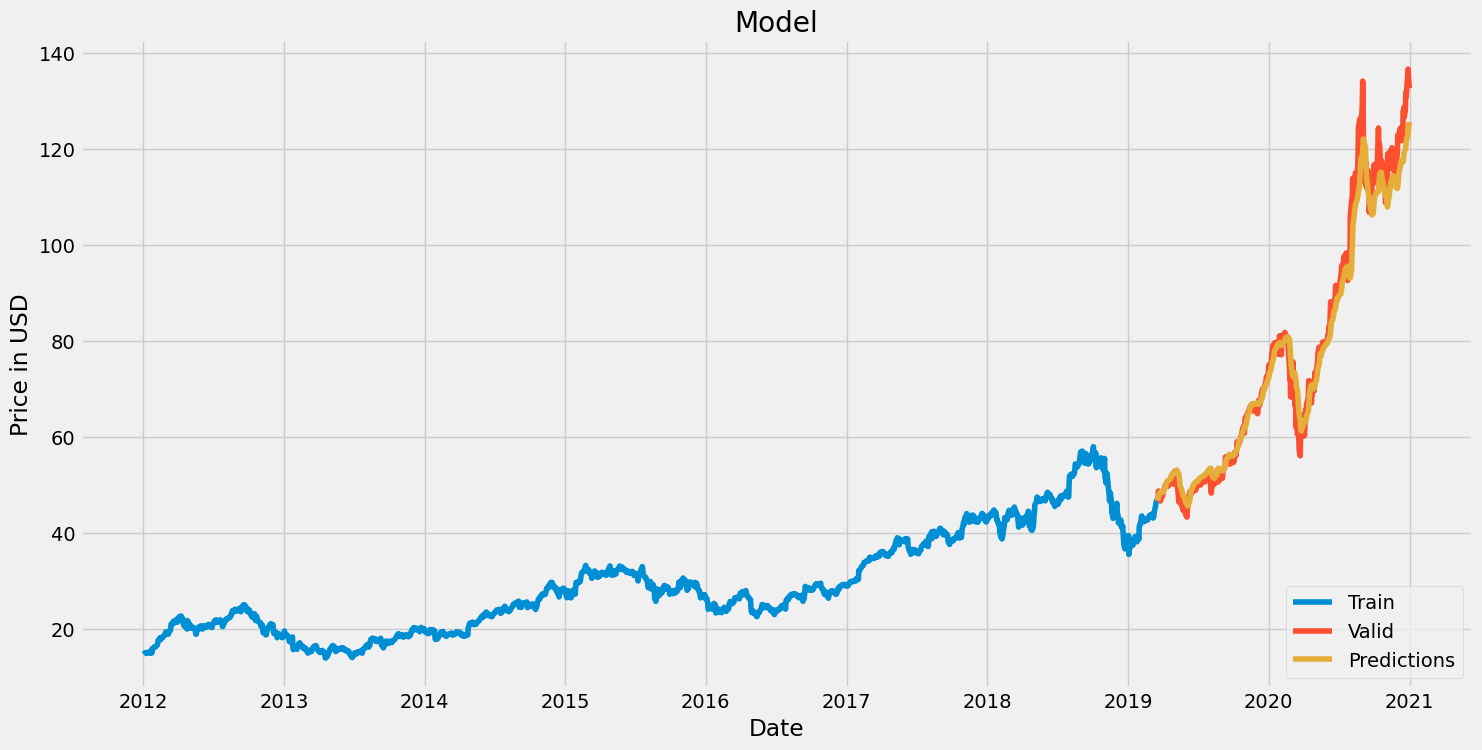

In [6]:

test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
accurate = False
if rmse > 0:
    accurate = True
    
train = df[:training_data_len]
valid = df[training_data_len:]

valid["Predictions"] = predictions

plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Valid", "Predictions"], loc="lower right")
plt.show()



In [8]:

new_df = pdr.DataReader(symbol, data_source="yahoo", start="2012-01-01", end= "2021-01-01")
new_df = new_df.filter(["Close"])
last_60_days = df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

new_x = []
new_x.append(last_60_days_scaled)

new_x = np.array(new_x)
new_x = np.reshape(new_x, (new_x.shape[0], new_x.shape[1], 1))

pred_price = model.predict(new_x)
pred_price = scaler.inverse_transform(pred_price)

pred_price = pred_price[0][0]
closing_price = np.array(new_df["Close"])
closing_price = closing_price[len(new_df) - 1]

print(closing_price)
print(pred_price)
min = 10
best_stocks = []
stock_to_diff = {}

if accurate:
    difference = pred_price - closing_price
    stock_to_diff[symbol] = difference

top_5_best = []
min = 1000
for symbol in range(0, len(stock_to_diff.keys())):
    if stock_to_diff[symbol] < min or len(top_5_best) < 5:
        top_5_best.append(symbol)
        
print(f"The top 5 best stocks are: ")
for i in range(0, len(top_5_best)):
    print(top_5_best[i] + "\n")
            
        
        


1/1 [==============================] - 0s 264ms/step
132.69000244140625
125.85773
